# Salary prediction Decision Tree classifier


### Reading Excel file

In [1]:
import pandas as pd
df= pd.read_excel("Decision_Tree1.xlsx",sheet_name="Sheet1")
df

,Company,job,degree,salary_more_than_100k
0,google,sales executive,bachelors,0
1,google,sales executive,master,0
2,google,business manager,bachelors,1
3,google,business manager,master,1
4,google,computer programmer,bachelors,0
5,google,computer programmer,master,1
6,abc pharma,sales executive,master,0
7,abc pharma,computer programmer,bachelors,0
8,abc pharma,business manager,bachelors,0
9,abc pharma,business manager,master,1


### Identifying Dependent and Independent

In [2]:
X=df.drop('salary_more_than_100k',axis='columns')
Y=df['salary_more_than_100k']

### Conversion of categorical variables to numaric

In [3]:
from sklearn.preprocessing import LabelEncoder

In [4]:
le_company= LabelEncoder()
le_job=LabelEncoder()
le_degree=LabelEncoder()

In [5]:
X['new_comp']=le_company.fit_transform(X['Company'])
X['new_job']=le_job.fit_transform(X['job'])
X['new_degree']=le_degree.fit_transform(X['degree'])

X

,Company,job,degree,new_comp,new_job,new_degree
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,master,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,master,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,master,2,1,1
6,abc pharma,sales executive,master,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,master,0,0,1


In [6]:
X=X.drop(['Company','job','degree'],axis="columns")
X

,new_comp,new_job,new_degree
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


### Building Model

In [7]:
from sklearn import tree

In [8]:
model=tree.DecisionTreeClassifier()

### Spliting dataset for training and testing

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=20)

In [10]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

### Calculating Score of model

In [11]:
model.score(x_test,y_test)

0.75

In [12]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(model.predict(x_test),y_test)
cm

array([[1, 1],
       [0, 2]], dtype=int64)

<AxesSubplot:>

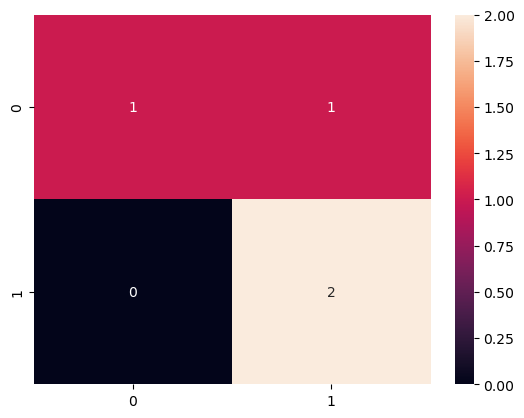

In [13]:
import seaborn as sns
sns.heatmap(cm,annot=True)

### Checking for random values

In [14]:
pred_salary=model.predict([[le_company.transform(['google'])[0],le_job.transform(['business manager'])[0],le_degree.transform(['master'])[0]]])
pred_salary

D:\Program Files\Anaconda\New folder\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [15]:
if pred_salary[0]==0:
    print("salary more than 100k")
else:
    print("salary not more than 100k")

salary not more than 100k
